In [1]:
import numpy as np
def U(): return np.random.rand()
import math as math
import matplotlib.pyplot as plt 

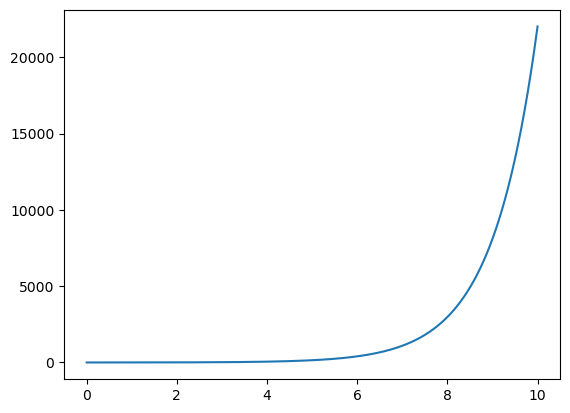

In [2]:
def f(x): return math.exp(x)
a, b = 0, 10
x = np.linspace(a, b, 1000)
y = np.exp(x)
plt.plot(x, y)

In [4]:
N, sum1, sum2, n = 1000, 0, 0, 0
L = b - a 

for i in range(N):
    x  = U()*(b-a) + a
    y = f(x)
    n += 1
    sum1 += f(x)
    sum2 += f(x)**2
mean1 = sum1/n
I = L*mean1 
mean2 = sum2/n
dI = (L*math.sqrt(mean2 - mean1**2))/math.sqrt(n)
print('Η τιμή του ολοκληρώματος είναι:',round(I,3), '+-',round(dI,3),'με σχετικό σφάλμα:',round(dI/I,3))

Η τιμή του ολοκληρώματος είναι: 21395.058 +- 1353.128 με σχετικό σφάλμα: 0.063


In [5]:
dIth = (b-a)*(math.sqrt(0.5*(1/(b-a))*(f(2*b) - f(2*a)) - ((1/(b-a))*(f(b) - f(a)))**2))/math.sqrt(n)
Ith = 22025.46
print('Η τιμή του ολοκληρώματος σύμφωνα με την αναλυτική μεθόδο είναι:',round(Ith,3), '+-',round(dIth,3),'με σχετικό σφάλμα:',round(dIth/Ith,3))

Η τιμή του ολοκληρώματος σύμφωνα με την αναλυτική μεθόδο είναι: 22025.46 +- 1393.092 με σχετικό σφάλμα: 0.063


In [6]:
def monte_carlo(N = 1000):
    n, sum1, sum2 = 0, 0, 0
    for i in range(N):
        x  = U()*(b-a) + a
        y = f(x)
        n += 1
        sum1 += f(x)
        sum2 += f(x)**2
    mean1 = sum1/n
    I = L*mean1 
    mean2 = sum2/n
    dI = (L*math.sqrt(mean2 - mean1**2))/math.sqrt(n) 
    return {'result1': I, 'result2': dI}

Η μέση τιμή του ολοκληρώματος είναι: 22027.21900640546 με τυπική απόκλιση: 1393.3689478655915


(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 7.000e+00, 5.000e+00,
        7.000e+00, 1.400e+01, 2.600e+01, 2.500e+01, 2.600e+01, 5.000e+01,
        6.000e+01, 6.700e+01, 6.800e+01, 9.900e+01, 1.340e+02, 1.710e+02,
        1.690e+02, 2.590e+02, 2.760e+02, 3.280e+02, 3.760e+02, 4.070e+02,
        5.090e+02, 5.270e+02, 6.620e+02, 7.030e+02, 7.430e+02, 7.870e+02,
        9.450e+02, 9.940e+02, 1.027e+03, 1.191e+03, 1.183e+03, 1.206e+03,
        1.343e+03, 1.330e+03, 1.399e+03, 1.363e+03, 1.404e+03, 1.384e+03,
        1.353e+03, 1.340e+03, 1.350e+03, 1.277e+03, 1.196e+03, 1.213e+03,
        1.084e+03, 1.016e+03, 1.097e+03, 9.330e+02, 8.430e+02, 7.440e+02,
        6.770e+02, 6.280e+02, 5.160e+02, 5.160e+02, 4.210e+02, 4.040e+02,
        3.480e+02, 2.940e+02, 2.240e+02, 2.240e+02, 1.730e+02, 1.550e+02,
        1.290e+02, 1.060e+02, 9.200e+01, 7.900e+01, 4.400e+01, 5.800e+01,
        3.200e+01, 2.700e+01, 2.500e+0

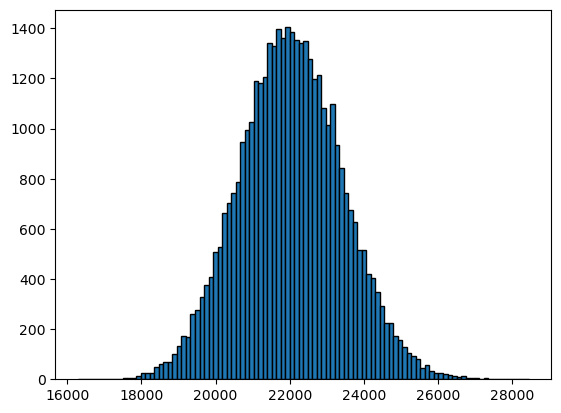

In [7]:
#Την καλώ 40000 φορές
M = 40000
I2 = []
for i in range(M):
    result = monte_carlo(N)
    I2.append(result['result1'])
I2_mean = np.array(I2).mean()
I2_std = np.array(I2).std()
print('Η μέση τιμή του ολοκληρώματος είναι:',I2_mean,'με τυπική απόκλιση:',I2_std)
plt.hist(I2, bins = 100, ec = 'black')

In [8]:
def sfalma(xmin, xmax, n):
    sfalmaI = (xmax-xmin)*(math.sqrt(0.5*(1/(xmax-xmin))*(f(2*xmax) - f(2*xmin)) - ((1/(xmax-xmin))*(f(xmax) - f(xmin)))**2))/math.sqrt(n)
    return sfalmaI

In [9]:
dI1 = sfalma(0, 5, 500)
dI2 = sfalma(5, 10, 500)
synolikosfalma=((dI1**2 + dI2**2)**0.5)
print('Το σφάλμα ολοκλήρωσης στην περιοχή 1 είναι:', round(dI1, 3) , 'και στην περιοχή 2:',round(dI2,3),'.')
print('Το συνολικό σφάλμα αθροίσματος των 2 περιοχών είναι:', round(synolikosfalma,3))

Το σφάλμα ολοκλήρωσης στην περιοχή 1 είναι: 8.165 και στην περιοχή 2: 1211.783 .
Το συνολικό σφάλμα αθροίσματος των 2 περιοχών είναι: 1211.81


In [10]:
def hit_miss(a, b, N):
    hit, miss = 0, 0
    V = f(b)*(b-a)
    for i in range(1000):
        x  = U()*(b-a) + a
        y = U()*(f(b)-f(a)) + f(a)
        if y <= f(x): hit += 1
        else: miss += 1
    p = hit/(hit+miss)
    I = p*V
    dI = (V*math.sqrt(p - p**2))/math.sqrt(N)
    return round(I,3), round(dI,3)

In [12]:
hm = hit_miss(0, 10, 1000)
hm1 = hit_miss(0, 5, 500)
hm2 = hit_miss(5, 10, 500)
print('Με την χρήση hit or miss, η τιμή του ολοκληρώματος και του σφάλματος είναι:',hm,'. Χωρίζοντας το διάστημα στα δύο έχουμε:',hm1,'και',hm2,'αντίστοιχα.')

Με την χρήση hit or miss, η τιμή του ολοκληρώματος και του σφάλματος είναι: (20044.084, 2003.307) . Χωρίζοντας το διάστημα στα δύο έχουμε: (124.667, 12.407) και (21916.333, 1966.403) αντίστοιχα.
